# **R基礎 その3**

このテキストでは、基本的な統計検定について触れた後、様々なパッケージを利用して、様々な図形を描写してみます。

細かいコードの意味は大丈夫なので、Rを使うとどういったことが出来るのか、体験してみましょう。

今後使う機会が出て来たり気になる機能があれば、より細かい使い方等は自分で調べてみて下さい。

# 統計解析

まだ統計学に関しては講義等で触れたことが無い人も多いかとは思いますが、

研究やサイエンスを学んでいく上で、「検定」や「回帰分析」などには必ず触れる機会があると思います。

今回はRに用意されている統計解析用のパッケージを用いて基本的な検定などを試してみます。

今後、様々な検定や統計処理を学ぶ機会があると思いますが、その大部分はRで簡単に行うことが出来ることを覚えておくと良いでしょう。



## サッカー選手のデータを使って検定する

前回使ったサッカー選手のデータを使って試して見ます。

## t検定
「検定」と呼ばれるものの中で最もポピュラーな**t検定**というものをやってみます。

t検定とは、ものすごく簡単に言うと**2組のデータについて平均値に有意な差があるかどうか統計的に調べる方法**です。

(有意な差とは、誤差では済まされない意味のある差、という感じです。)


---


今回は**「ポジションがDefenderとForwardの選手の間で、得点数の平均値に差があるのか」**、**統計的に**確認してみましょう。

得点数は`goals_overall`という列のデータです。

In [61]:
# web上のデータを読む
df <- read.csv("https://raw.githubusercontent.com/slt666666/informatics_agri_1st/main/source/_static/data/england-premier-league-players-2018-to-2019-stats.csv")
# head(データフレーム) ... データフレームの最初の数行だけ表示
head(df)

,full_name,age,birthday,birthday_GMT,league,season,position,Current.Club,minutes_played_overall,minutes_played_home,⋯,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,⋯,1.25,72,79,1589,1589,0.06,290,191,80,20
2,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,⋯,1.48,61,76,1217,1217,0.07,196,187,-1,10
3,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,⋯,1.78,51,80,582,2327,0.15,144,233,-1,3
4,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,⋯,0.81,111,47,0,221,0.00,69,8,-1,5
5,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,⋯,1.30,69,35,0,0,0.00,-1,-1,-1,31
6,Aaron Wan-Bissaka,23,880502400,1997/11/26,Premier League,2018/2019,Midfielder,Crystal Palace,3135,1605,⋯,1.18,76,90,523,1045,0.17,312,160,-1,22


### 平均値を計算してみる

まずは、データフレームからデータを取り出し、`mean`関数を使うことでDefender, Forwardそれぞれのゴール数の平均値を計算してみます。

In [3]:
# 平均値を計算してみる
# Defenderの得点平均値
DF_score <- df[df$position == "Defender", "goals_overall"]
print(mean(DF_score))

# Forwardの得点平均値
FW_score <- df[df$position == "Forward", "goals_overall"]
print(mean(FW_score))

[1] 0.7089947
[1] 4.447368


### グラフで確認してみる

単純に得点数の平均を見ると、(当然ですが)Forwardの方が高い平均値になっています。

次に、前回扱った`ggplot2`ライブラリを使ってグラフを描き、差をもう少し詳しく見てみます。

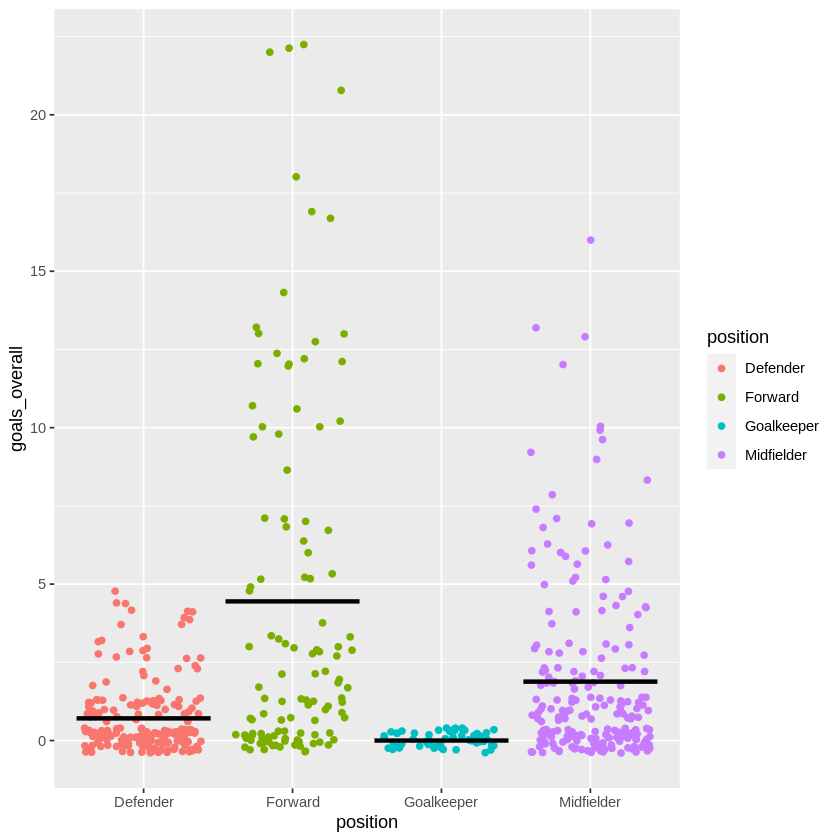

In [4]:
library(ggplot2)
g <- ggplot(df, aes(x = position, y = goals_overall, color=position)) # データの指定、x軸にposition, y軸にゴール数を指定。色はポジションごとに分ける。
g <- g + geom_jitter() # 点が重ならない様にプロット
g <- g + stat_summary(fun = "mean", geom = "crossbar", colour = "black") # 平均値の黒線を引く関数があります。
plot(g)

### t検定をして統計的に確認してみる

グラフからも明らかにForwardの選手の方がDefenderの選手達よりたくさん得点していることが分かりますね。

それではこの差を**t検定**を使って、**統計的に**確認してみましょう。

Rでは、`t.test(データ1, データ2)`という関数でt検定を行うことが出来ます。まずはやってみましょう。

---

<small>※厳密には`t.test(データ1, データ2, var.equal=T)`という形でデータの等分散性を指定する必要がありますが今回は省略しています。</small>

<small>t検定について学んだ際に思い出してみて下さい。</small>

In [17]:
# Defenderの得点
DF_score <- df[df$position == "Defender", "goals_overall"]

# Forwardの得点平均値
FW_score <- df[df$position == "Forward", "goals_overall"]

 t.test(DF_score, FW_score)


	Welch Two Sample t-test

data:  DF_score and FW_score
t = -6.8586, df = 118.53, p-value = 3.359e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.817700 -2.659048
sample estimates:
mean of x mean of y 
0.7089947 4.4473684 


<small>※読み飛ばして貰ってもOKです</small>

　3行目あたりにp-value(p値)というものが出てきていると思いますが、p値がどれだけ**小さいか**が統計検定では非常に重要になってきます。

検定では、ある仮説を立てて(FWとDFでゴール数に差が無い、等)、その仮説にデータが従っているかどうかを確認しています。

p値とは簡単に言うと、その仮説の下で、実際に観測された結果を取得する確率です。

* p値が小さい = 立てた仮説のもとでは発生しにくいデータである(=仮説が間違っている可能性が高い)

* p値が大きい = 立てた仮説のもとで発生しうるデータである(=仮説通りの可能性が高い)

ということを表します。

　今回の検定で説明すると、まずDefenderとForwardのゴール数の平均値に**差が無い**という仮説を立てています。

そしてt検定の結果として、とても小さなp値が得られたということは、今回の様なデータは**ゴール数の平均値に差が無いという仮説の下ではほとんど起きない**データということになります。

→ つまり、仮説(ゴール数の平均値に差が無い)が間違っている

→ つまり、ゴール数の平均値に差がある、というのが正しかった

という様な形です。

　サイエンスでは、p値に0.05や0.01といった基準を設けて、p値がそれ以下であれば、「ゴール数の差は5%水準で有意である」という風な言い方をしたりします。

### 実習

先程はDefenderとForwardのゴール数の平均値に差が有るか無いかをt検定で確認しました。

ここでは練習として、DefenderとForwardの年齢(age)の平均値に差が有るか無いかをt検定で確認してみましょう。

下のコードの`???`を埋めてみましょう。


In [ ]:
# グラフでポジションごとの年齢を可視化
library(ggplot2)
g <- ggplot(df, aes(x = position, y = ???, color=position)) # データの指定、x軸にposition, y軸にゴール数を指定。色はポジションごとに分ける。
g <- g + geom_jitter() # 点が重ならない様にプロット
g <- g + stat_summary(fun = "mean", geom = "crossbar", colour = "black") # 平均値の黒線を引く関数があります。
plot(g)

# このコードを埋めて下さい。
# ageの差をt検定
DF_age <- df[df$position == "Defender", ???]
FW_age <- df[df$position == "Forward", ???]
t.test(???, ???)

### 差を統計的に確認する必要がある理由

　そもそもなぜこの様な「検定」をする必要があるのでしょうか。

たとえばあるコインを投げて表になるか裏になるか調べたいとします。

そこで、

* コインを3回だけ投げて3回とも裏だった場合、「このコインは100%の確率で裏が出ます」と言ってしまって良いでしょうか？
  * 感覚的にはダメな気がするんじゃないでしょうか。
* では、10回投げて3回表7回裏だった場合、「このコインは表が30%の確率で出るコインです」と言えるでしょうか？
  * やっぱりまだ感覚的にはダメな気がしますね。
* 最後に、1000000000回投げて500000000回表、500000000回裏が出た場合はどうでしょうか。
  * 感覚的には...表裏が同じ確率出るコインだと言ってしまえそうな感じがしますね。

　最初の2つの例の様に、限られた試行回数やサンプル数をもとに差があるかどうか(今回だと表裏の確率に差があるかどうか)を断言するというのは、中々難しい場合が多いです。

　そこで、科学の世界では、検定と呼ばれる統計処理を行うことで、今回得られたデータからどの程度「差がある/ない」と言ってしまえるかを定量的に示すことが必要になります。

　今回のサッカー選手の例でいうと、DefenderとForwardの得点数の差は何億回試合をしても生じるようなものなのか、それとも今年度だけたまたまそういう結果になってしまう程度の差なのか、それを定量的に知る方法の1つが統計の検定になります。

　恐らく2回生では統計学について触れることになると思いますが、その際に様々な検定や統計手法について詳しく学んでみてください。


## 回帰分析

　次は簡単な回帰分析も少しやっておきます。Excelでも少しやりましたね。

先程のグラフから、ポジションがForwardの選手達が(当然なんですが)主にゴールしていることが分かりました。ただ、Forwardの選手の中でもたくさんゴールしてる選手としていない選手がいることが分かります。

では、その原因を探るために、今回はポジションがForwardの選手達において、プレイ時間`minutes_played_overall`とゴール数`goals_overall`に関係性があるのか回帰分析で調べてみます。

### グラフで確認してみる

なにはともあれまずは目で見て関係性がありそうか、見てみます。

`ggplot2`で可視化してみましょう。

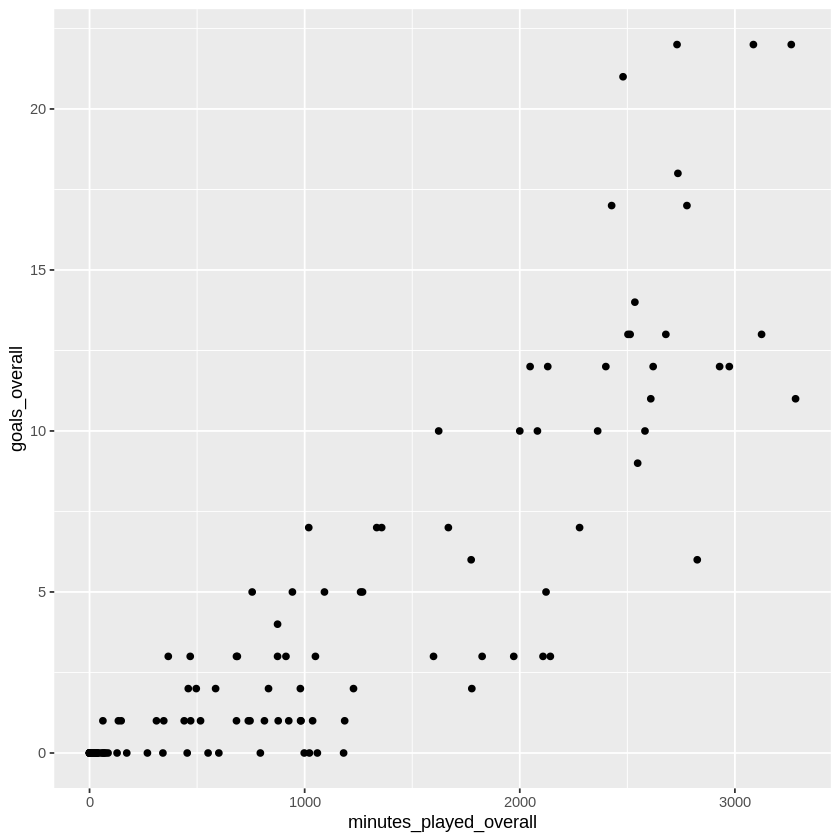

In [7]:
# positionがForwardの選手のデータだけforward_dfとして取り出す
forward_df <- df[df$position == "Forward", ]

g <- ggplot(forward_df, aes(x = minutes_played_overall, y = goals_overall)) 
g <- g + geom_point()
plot(g)

### 回帰分析してみる

グラフを見ると、どうやら(当たり前のことですが)プレイ時間が長い選手ほどゴール数が多いみたいですね。

プレイ時間とゴール数には正の関係がありそうです。この関係を回帰分析によって詳しく見てみます。

Rでは、`lm(y ~ x, data = データフレーム)`という関数で単回帰分析を行うことが出来ます。

($y = a x + e$の様なイメージです。)

ゴール数を`y`、プレイ時間を`x`として回帰分析してみましょう。

In [28]:
 result <- lm(goals_overall ~ minutes_played_overall, data = forward_df) # 回帰分析を行う
 summary(result) # 分析結果の要約


Call:
lm(formula = goals_overall ~ minutes_played_overall, data = forward_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8929 -1.6233  0.6986  1.1446  9.8214 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.1445553  0.4119613  -2.778  0.00641 ** 
minutes_played_overall  0.0049690  0.0002743  18.117  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.913 on 112 degrees of freedom
Multiple R-squared:  0.7456,	Adjusted R-squared:  0.7433 
F-statistic: 328.2 on 1 and 112 DF,  p-value: < 2.2e-16


ここでは、`Coefficients:`と書いてある項目を確認します。

その下の`minutes_played_overall`と書いてある行の最後(`Pr(>|t|)`の列)に`< 2e-16 ***`と書いてありますね。この値が先程説明したp値の様なものです。

ここでも検定が行われており、詳しくは省略しますが、**プレイ時間はゴール数に影響を与えているかどうか**を検定しています。

2×10の－16乗未満ということで非常に小さいので、プレイ時間とゴール数の間に何の関係もないという仮説ではありえない結果である

→仮説が間違っていて、プレイ時間はゴール数に影響を与えていると統計的に言える、という形になります。

ちなみにggplotで回帰直線を引くことも出来ます。

`geom_smooth()` using formula 'y ~ x'



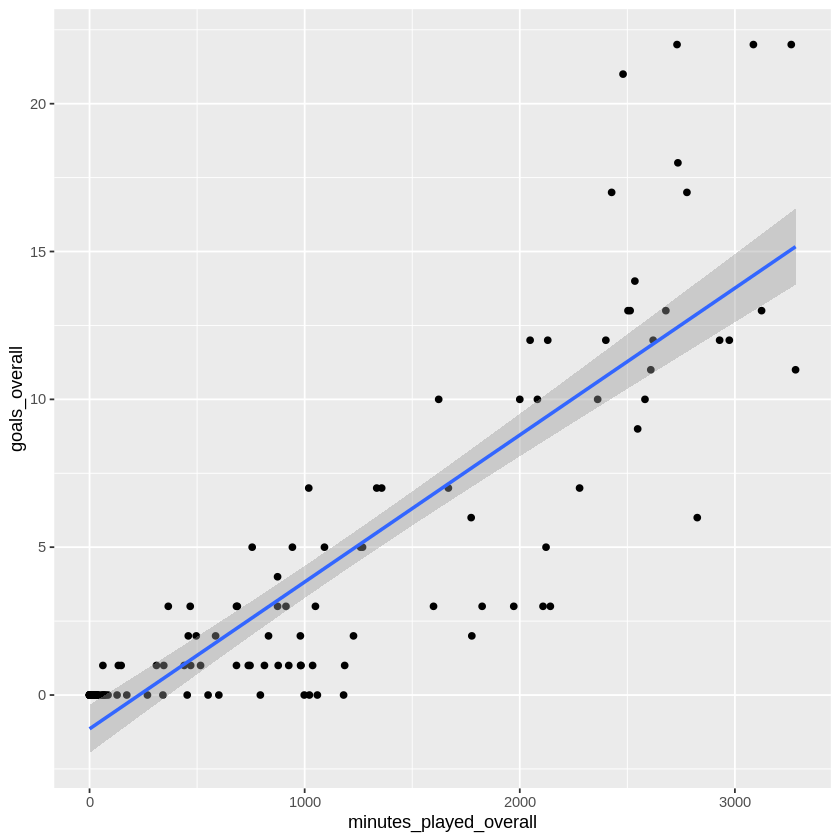

In [8]:
# 回帰直線を加える
g <- ggplot(forward_df, aes(x = minutes_played_overall, y = goals_overall)) 
g <- g + geom_point()
g <- g + geom_smooth(method = "lm")
plot(g)

### 実習

先程はForwardのゴール数とプレイ時間の関係性を回帰分析で確認しました。

ここでは練習として、Forwardの年齢(age)とゴール数(goals_overall)の関係性を回帰分析で確認してみましょう。

下のコードの`???`を埋めてみましょう。

In [ ]:
# 下記のコードを埋めてみて下さい。
# まずはグラフで確認してみる
g <- ggplot(forward_df, aes(x = ???, y = goals_overall)) 
g <- g + geom_point()
g <- g + geom_smooth(method = "lm")
plot(g)

# ageとgoals_overallで回帰分析
result <- lm(??? ~ ???, data = forward_df) # 回帰分析を行う
summary(result) # 分析結果の要約

# 様々なパッケージ
Rでは様々なパッケージが用意されており、目的に応じた解析やグラフ描写を行うことが出来ます。

今回は幾つかのパッケージを試しに使ってみましょう。

使い方を覚えるのでは無く、どの様なことが出来るかを知ってもらうことが目的です。

<small>パッケージのインストールは`install.packages("パッケージ名")`で行うと前回言いましたが、時間がかかるので、予め用意しておきました</small>

In [19]:
system("wget -q -O library.tgz https://github.com/slt666666/informatics_agri_1st/raw/main/source/_static/colab_notebook/library.tgz")
system("tar zxvf library.tgz")
.libPaths("library")

## ネットワーク図

ゲノム解析の世界では、遺伝子ネットワーク図というものが描かれることがあります。

<img src="https://github.com/slt666666/informatics_agri_1st/raw/main/source/_static/images/programming/network.png" alt="network" height="400px">

機能的に関係のある遺伝子同士を結んだり、同じ経路上で動く遺伝子をつなぐことで、

遺伝子間の関係性や働き方を可視化する方法の1つです。

ネットワーク図の描写には`igraph`というパッケージが良く用いられます。

`igraph`の一番基本的な使い方として、結びたい点と点のデータからなるデータフレームを作成して、ネットワーク図を描く方法になります。

In [42]:
# 例
# データフレームの作成
test_data <- data.frame(gene1=c("a", "a", "b", "c", "d"), gene2=c("b", "c", "c", "a", "a"))
test_data

gene1,gene2
<chr>,<chr>
a,b
a,c
b,c
c,a
d,a


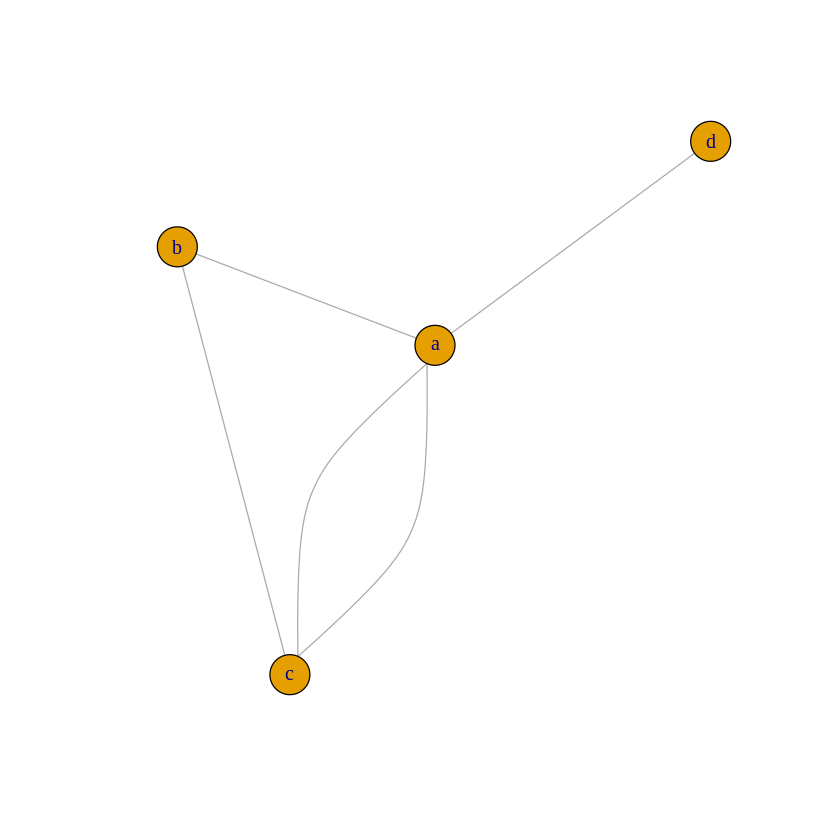

In [45]:
# パッケージの呼び出し
library(igraph)

# test_dataをもとにgraph.data.frame関数でネットワーク図を描く
g <- graph.data.frame(test_data, directed = F)
plot(g)

### 共発現している遺伝子のネットワーク

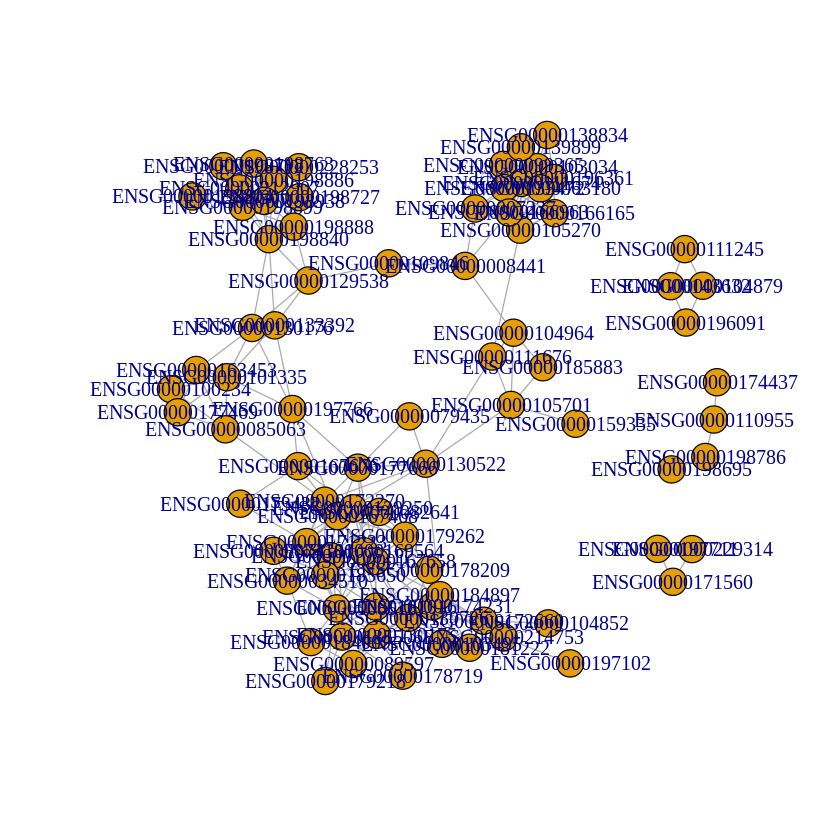

In [58]:
df <- read.table("https://raw.githubusercontent.com/slt666666/informatics_agri_1st/main/source/_static/data/Gene_expression.csv", sep=",", header=T)
df <- df[df$value >= 0.75, ]
g <- graph.data.frame(df, directed = F)

num.of.v <- length(V(g))
V(g)$size  <- rep(10, num.of.v)
V(g)$label.cex   <- rep(1, num.of.v)
plot(g)

## 系統樹

進化的な解析をする際に、系統樹を描くことがあります。

遺伝子レベルでの系統樹や種レベルでの系統樹など、目的は様々です。

最近は系統樹の描写にiTOLなどのwebアプリケーションが使われることも多いです。

In [ ]:
library(ape)
data(woodmouse)
wm.d<-dist.dna(woodmouse)
wm.hc<-hclust(wm.d,"average")
wm.phy<-as.phylo(wm.hc)
plot(wm.phy)

## 地図の描写
フィールドワークなどを行う研究をする人は、地図を描写する機会が多くなります。

PowerPointで作成したり、模式的な図を自分で描いたりしても良いのですが、Rを使うことで座標レベルで指定した地図を容易に描写することが出来ます。

In [ ]:
library(maps)
library(mapdata)

map("japan", interior = FALSE)
map("japan", boundary = FALSE, lty = 2, add = TRUE)

In [ ]:
library(magrittr)
library(leaflet)

library(htmlwidgets)
m <- leaflet() %>% 
    addTiles() %>% 
    setView(lng=135,lat=35,zoom=7)
saveWidget(m, file="m.html")